In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from azureml.core import Workspace, Dataset

import matplotlib as mpl
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data/weather_dataset.csv')

In [3]:
data.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,rain
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,rain
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,rain
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,NaN
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,rain


In [4]:
print(f'Le format des données est: {data.shape}')

Le format des données est: (96453, 11)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S_No                    96453 non-null  int64  
 1   Timestamp               96453 non-null  object 
 2   Location                96453 non-null  object 
 3   Temperature_C           96453 non-null  float64
 4   Apparent_Temperature_C  96453 non-null  float64
 5   Humidity                96453 non-null  float64
 6   Wind_speed_kmph         96453 non-null  float64
 7   Wind_bearing_degrees    96453 non-null  int64  
 8   Visibility_km           96453 non-null  float64
 9   Pressure_millibars      96453 non-null  float64
 10  Weather_conditions      96448 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 8.1+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S_No,96453.0,48226.000000,27843.727094,0.000000,24113.000000,48226.0000,72339.000000,96452.000000
Temperature_C,96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent_Temperature_C,96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind_speed_kmph,96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind_bearing_degrees,96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility_km,96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Pressure_millibars,96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


## Exploration

In [7]:
# Check missing values
data.isnull().sum()

S_No                      0
Timestamp                 0
Location                  0
Temperature_C             0
Apparent_Temperature_C    0
Humidity                  0
Wind_speed_kmph           0
Wind_bearing_degrees      0
Visibility_km             0
Pressure_millibars        0
Weather_conditions        5
dtype: int64

* there are five missing values of target variable

In [8]:
# We are going to fill that with previous values each value
data['Weather_conditions'].fillna(method='ffill', inplace=True, axis=0)

In [9]:
data['Weather_conditions'].value_counts()

rain     82271
snow     10712
clear     3470
Name: Weather_conditions, dtype: int64

In [10]:
data['Weather_conditions'].replace({"snow": "no_rain",  "clear": "no_rain"}, inplace=True)
data['Weather_conditions'].value_counts()

rain       82271
no_rain    14182
Name: Weather_conditions, dtype: int64

<AxesSubplot:xlabel='Weather_conditions', ylabel='count'>

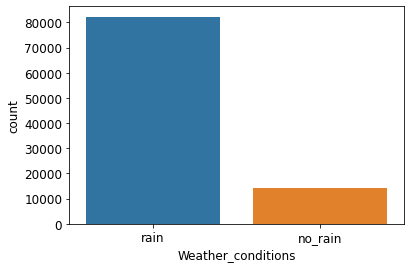

In [11]:
sns.countplot(x='Weather_conditions', data=data)

## Feature Engineering

In [12]:
#Convert target feature to categorical feature 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = data['Weather_conditions']
y = le.fit_transform(y)
data['Weather_condition'] = y

In [13]:
data.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions,Weather_condition
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,rain,1
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,rain,1
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,rain,1
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,rain,1
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,rain,1


In [14]:
data.drop(['S_No', 'Weather_conditions'], axis=1, inplace=True)

In [15]:
# Transform column Timestamp of object type to datetime type
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [16]:
data.dtypes

Timestamp                  object
Location                   object
Temperature_C             float64
Apparent_Temperature_C    float64
Humidity                  float64
Wind_speed_kmph           float64
Wind_bearing_degrees        int64
Visibility_km             float64
Pressure_millibars        float64
Weather_condition           int32
dtype: object

In [17]:
# Nous have to forcast weather conditions 4 hours in future, let's shift dataset of 4 period since each sample is 
# producted to each hour 
data['new_Weather_condition'] = data['Weather_condition'].shift(periods=4, axis=0)

#delete Nan values
data.dropna(inplace=True)

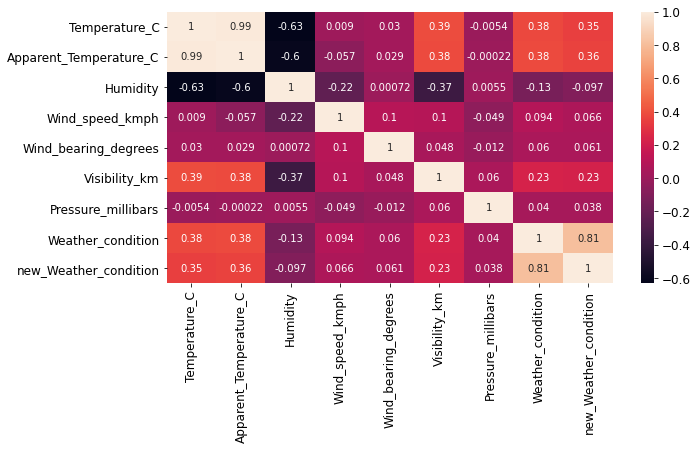

In [19]:
# Let's glance correlations between variables
plt.figure(figsize=(10,5))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Remarks
* Temperature_C and Apparent_Temperature_C are strongly corrolated
* We have to delete one of two

In [20]:
data.drop(['Apparent_Temperature_C'], axis=1, inplace=True)

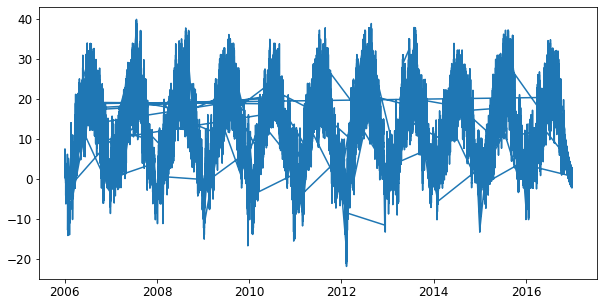

In [23]:
# plot graph
plt.figure(figsize=(10,5))
plt.plot(data['Timestamp'], data['Temperature_C'])
plt.show()